## Day1

In [1]:
!pip install diffusers transformers accelerate

In [2]:
from huggingface_hub import login
from google.colab import userdata

hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [3]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "OFA-Sys/small-stable-diffusion-v0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torchdtype=torch.float16)
pipe = pipe.to("cuda")
pipe.enable_model_cpu_offload()

prompt = "A futuristic class full of students learning AI coding in the surreal style of Salvador Dali"
image = pipe(prompt).images[0]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.79k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'torchdtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The config attributes {'predict_epsilon': True} were passed to DPMSolverMultis

  0%|          | 0/50 [00:00<?, ?it/s]

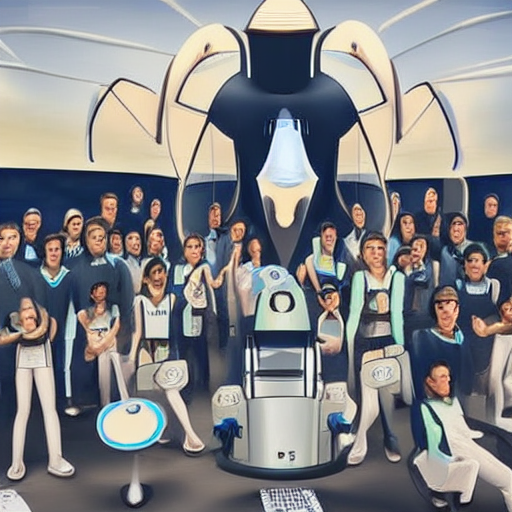

In [4]:
from IPython.display import display
from PIL import Image

display(image)

In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [7]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hi to an artificial intelligence engineer on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

Device set to use cuda


In [8]:
from IPython.display import Audio
Audio("speech.wav")